
# Project: Investigate a Movie Dataset (TMDB 5000 Movie Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Websites used
Mostly stackoverflow, i googled and stackoverflow was the first hit i got mostly

<a id='intro'></a>
## Introduction


In this movie dataset more than 10.000 movies and their features are listed. Some of the features are Genre, Revenue, Year or Director. 
Over the course of the analysis of this movie dataset I want to find out how adjustet budget and revenue have developed over the years, which genres have been the most popular over the years, if higher popularity levels lead to higher ratings and which directors made the most revenue.

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [144]:
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Use info() to see how many rows (10866) and columns (21) we have. Additionally we get the columns names and an overview over the datasets data types. "release_date" would be better suited with a data type of date but we only need the movie's release year (we have a column for that), so it's fine.
We have some columns with missing data that we have to address.

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Check if we have duplicate movies in our dataset

In [146]:
df["original_title"].nunique()

10571

Seems like we have movies with the same title in our database. Are those duplicates or just different movies with the same title (remakes?)? Let's check for duplicates

In [147]:
sum(df.duplicated())

1

So we only found 1 duplicate row that we can get rid of.

Use describe() to get a feeling for our int and float columns. A mean runtime of 102 minutes seems right. All our movies are released from 1960 to 2015. But more than 50% of our movies have a budget, revenue, budget_adj and/or revenue_adj of "0" rather than null. Only one of those can be 0 or more of those. We can't drop those rows because those are too many (under 4.000 movies would be left). 

In [148]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning
We want to get rid of our duplicate first by dropping it. After that we want to drop columns that we don't need for our analysis to trim our dataset.  
Additionally we will drop rows with missing data and "0" instead of null data

Drop duplicate row and check if successful

In [149]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

Drop rows we don't need for analysis (and that have many null values) like imdb_id, homepage, keywords, tagline, overview and production_companies. Check for success with df.shape

In [150]:
drop_columns = ["imdb_id", "homepage", "keywords", "tagline", "overview", "production_companies"]
df.drop(columns=drop_columns, inplace=True)

In [151]:
df.shape

(10865, 15)

Drop rows with null values, check for success with info()

In [152]:
df.dropna(axis=0, inplace=True)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10731 non-null  int64  
 1   popularity      10731 non-null  float64
 2   budget          10731 non-null  int64  
 3   revenue         10731 non-null  int64  
 4   original_title  10731 non-null  object 
 5   cast            10731 non-null  object 
 6   director        10731 non-null  object 
 7   runtime         10731 non-null  int64  
 8   genres          10731 non-null  object 
 9   release_date    10731 non-null  object 
 10  vote_count      10731 non-null  int64  
 11  vote_average    10731 non-null  float64
 12  release_year    10731 non-null  int64  
 13  budget_adj      10731 non-null  float64
 14  revenue_adj     10731 non-null  float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.3+ MB


Now we should be good to go. We got rid of columns that have many null values or that we don't need, dropped duplicate and dropped null value rows

<a id='eda'></a>
## Exploratory Data Analysis


### 1) What's the mean adjusted budget and revenue over the years (1960 - 2015)?

Firstly, we need the mean adjusted revenue per year and store it in a variable

In [154]:
means_rev = df.groupby("release_year")["revenue_adj"].mean()
means_rev

release_year
1960    3.340991e+07
1961    7.947167e+07
1962    4.856238e+07
1963    3.924580e+07
1964    5.707603e+07
1965    9.057670e+07
1966    1.237527e+07
1967    1.269224e+08
1968    4.367372e+07
1969    4.833818e+07
1970    7.866032e+07
1971    3.964586e+07
1972    6.449502e+07
1973    1.092939e+08
1974    7.811482e+07
1975    8.817223e+07
1976    6.530237e+07
1977    1.400939e+08
1978    7.044251e+07
1979    8.880802e+07
1980    5.999930e+07
1981    5.190054e+07
1982    6.858277e+07
1983    6.314877e+07
1984    5.319304e+07
1985    5.397841e+07
1986    4.978122e+07
1987    5.358111e+07
1988    4.855097e+07
1989    6.729647e+07
1990    6.720056e+07
1991    5.665942e+07
1992    7.155756e+07
1993    5.931408e+07
1994    5.672917e+07
1995    7.530127e+07
1996    5.692008e+07
1997    7.578340e+07
1998    6.047132e+07
1999    6.636262e+07
2000    6.206358e+07
2001    6.852431e+07
2002    6.724196e+07
2003    6.385821e+07
2004    6.315163e+07
2005    5.108613e+07
2006    4.357665e+07


Then we do the same for the budget

In [155]:
means_bud = df.groupby("release_year")["budget_adj"].mean()
means_bud

release_year
1960    5.082036e+06
1961    1.085687e+07
1962    1.232693e+07
1963    1.535687e+07
1964    6.608980e+06
1965    1.388168e+07
1966    8.405522e+06
1967    1.731417e+07
1968    1.186797e+07
1969    8.347547e+06
1970    1.782663e+07
1971    7.441067e+06
1972    4.729510e+06
1973    5.821133e+06
1974    7.399635e+06
1975    5.182556e+06
1976    9.958339e+06
1977    1.038088e+07
1978    1.074791e+07
1979    1.343162e+07
1980    1.229729e+07
1981    1.093101e+07
1982    1.221309e+07
1983    1.420610e+07
1984    1.471776e+07
1985    1.405353e+07
1986    1.168003e+07
1987    1.097986e+07
1988    1.198332e+07
1989    1.406740e+07
1990    1.630870e+07
1991    1.765094e+07
1992    1.692668e+07
1993    1.517681e+07
1994    1.782289e+07
1995    2.356888e+07
1996    2.525019e+07
1997    3.379143e+07
1998    2.866274e+07
1999    3.369195e+07
2000    3.252053e+07
2001    2.882982e+07
2002    2.705382e+07
2003    2.632182e+07
2004    2.696341e+07
2005    2.271258e+07
2006    1.955541e+07


Now we have everything to plot it.
Revenue seems volatile from 1960-1980 (big spikes). Maybe we don't have that many movies for those years?
Other than that, mean revenue and budget are going down in our dataset. Those means really depend on how many movies you have per year. The more movies you have per year the lower your mean revenue and budget get (you only have so many "Blockbuster"). But the gap between those two seems to be stagnant since around 2005. 
Additionally we have to keep in mind that we have many "0" values for revenue and budget which lowers the mean. So in reality we should have higher means. 

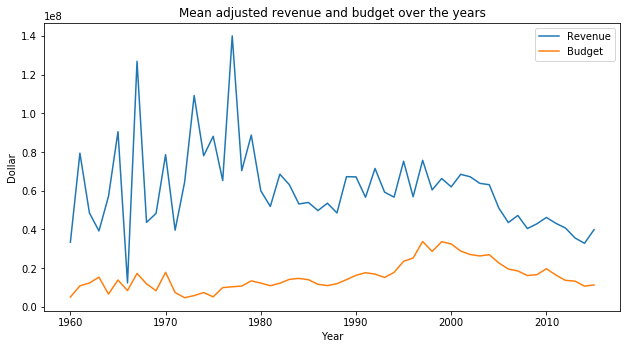

In [156]:
diag = plt.figure(figsize=(8,4))

ax = diag.add_axes([0,0,1,1])

ax.plot(means_rev.index, means_rev, label = "Revenue")
ax.plot(means_bud.index, means_bud, label = "Budget")
plt.xlabel("Year")
plt.ylabel("Dollar")
plt.title("Mean adjusted revenue and budget over the years")
plt.legend();

Extra: how many movies do we have per year?
Until 1980s we only have around 30-60 movies per year. Later we have a couple hundred per year. If you only have 30 movies per year that performed descently well, you can get a higher spike than when you have the mean over 500 movies  (maybe some of those are independent movies with a small budget).

In [157]:
df.groupby("release_year")["budget_adj"].count()

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     38
1968     38
1969     30
1970     40
1971     55
1972     40
1973     55
1974     46
1975     44
1976     47
1977     56
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    104
1985    108
1986    120
1987    124
1988    142
1989    135
1990    132
1991    133
1992    132
1993    177
1994    184
1995    174
1996    203
1997    191
1998    210
1999    224
2000    224
2001    241
2002    264
2003    281
2004    307
2005    361
2006    404
2007    432
2008    486
2009    525
2010    475
2011    532
2012    574
2013    649
2014    682
2015    617
Name: budget_adj, dtype: int64

### 2) What's the most popular genre over the years?

To answer that question we can group by year, look at our column "genres" and only show the genre with most counts.
We get a pretty clear picture of more modern movies: Since 1981 it's either Drama, Comedy or a mixture of both. We had a more diverse picture from 1960 to 1980 with genres like Horror, Action, Thriller, Science Fiction and even Western in the mix. 

In [158]:
df.groupby("release_year")["genres"].apply(lambda x: x.value_counts().index[0])

release_year
1960                    Horror
1961                     Drama
1962                     Drama
1963                    Horror
1964            Comedy|Romance
1965                     Drama
1966            Action|Western
1967      Comedy|Drama|Romance
1968                    Comedy
1969                     Drama
1970                    Horror
1971                     Drama
1972                    Comedy
1973               Crime|Drama
1974                     Drama
1975                    Comedy
1976           Horror|Thriller
1977    Horror|Science Fiction
1978                    Horror
1979                    Comedy
1980             Action|Comedy
1981                    Comedy
1982                    Comedy
1983                    Comedy
1984                    Comedy
1985                     Drama
1986                    Comedy
1987                    Comedy
1988                     Drama
1989                    Comedy
1990              Comedy|Drama
1991                     D

### 3) Who are the top 5 directors in terms of adjusted revenue earned with their respective movies?

We group by director, look at our column "revenue_adj", get the sum, have a descending sorting and put it in a variable so we can use it for plotting

In [159]:
director_revs = df.groupby("director")["revenue_adj"].sum().sort_values(ascending=False)[:5]
director_revs

director
Steven Spielberg    1.520245e+10
James Cameron       7.327221e+09
Peter Jackson       7.019848e+09
George Lucas        6.313919e+09
Robert Zemeckis     5.655648e+09
Name: revenue_adj, dtype: float64

We can plot those 5 directors and their adjusted revenue in a bar plot.
You can clearly see that Steven Spielberg is above all with his 15 billion earned over all his movies he directed.

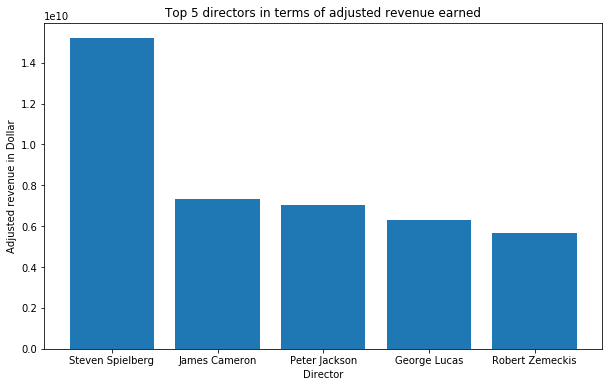

In [160]:
plt.subplots(figsize=(10,6))
plt.bar(director_revs.index, director_revs)
plt.xlabel("Director")
plt.ylabel("Adjusted revenue in Dollar")
plt.title("Top 5 directors in terms of adjusted revenue earned");

### 4) Do more popular movies get better scores?

First, we want create a new column with cut() that has different levels of popularity (low, moederately low, moderately high, high). For that, we need to get the edges with describe()

In [161]:
df["popularity"].describe()

count    10731.000000
mean         0.652615
std          1.004804
min          0.000188
25%          0.210765
50%          0.387081
75%          0.720889
max         32.985763
Name: popularity, dtype: float64

Now we have the edges to use cut()

In [162]:
edges = [0.000188, 0.210765, 0.387081, 0.720889, 32.985763]
bin_names = ["low", "moderately low", "moderately high", "high"]
df["pop_level"] = pd.cut(df["popularity"], edges, labels = bin_names)
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,pop_level
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,high
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,high
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,high
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,high
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,high


Group by pop_level and get the average vote per pop_level

In [163]:
vote_avg = df.groupby("pop_level")["vote_average"].mean()
vote_avg

pop_level
low                5.861298
moderately low     5.800969
moderately high    5.909955
high               6.286396
Name: vote_average, dtype: float64

pop_level "high" has the highest average voting of all pop_levels. The other 3 levels are pretty close to each other. We can visualise it in a bar plot.

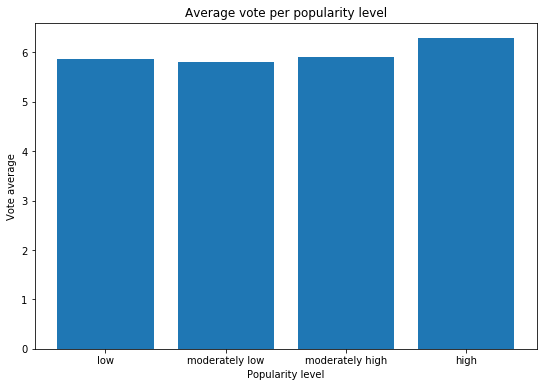

In [164]:
plt.subplots(figsize=(9,6))
plt.bar(vote_avg.index, vote_avg)
plt.xlabel("Popularity level")
plt.ylabel("Vote average")
plt.title("Average vote per popularity level");

<a id='conclusions'></a>
## Conclusions

That concludes my analysis of this dataset. It has to be said that many missing values in form of "0" values for budget and revenue make it harder to analyse those features.
What can be said about the dataset? If a movie has a "high" popularity level it leads by average to a better score than scores from all the other popularity levels.
The director with most revenue made is Steven Spielberg (around 15 billion dollar) and the most popular genres over the last 40 years are either Drama or Comedy. 
Further analysis regarding budget and revenue has to be made. Why are so few movies from earlier days in the set? Do we not have enough info about them? Maybe it would be better that analyse years that have a minimum of movies or a minimum of "0" values.
